## EDA and pre-processing of books scrapped

In [39]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from IPython import display

In [40]:
df = pd.read_csv('books.csv')
df.sample()

,title,category,rating,description,price,stock,url,cover_url
318,Crazy Love: Overwhelmed by a Relentless God,Christian,2,Have you ever wondered if we're missing it? It...,£47.72,14,http://books.toscrape.com/catalogue/unicorn-tr...,http://books.toscrape.com/media/cache/5d/34/5d...


In [41]:
# check for Nan
df.isnull().sum()

title          0
category       0
rating         0
description    2
price          0
stock          0
url            0
cover_url      0
dtype: int64

In [42]:
# replace Nan description with ""
df['description'] = df['description'].fillna("")

### Creating stop words list

In [69]:
# Concatenate all description from the data set
books_desc = ' '.join(df['description']).lower()
# Remove punctuation
books_desc = books_desc.replace(r'[!?,.\d()*-]+', ' ')
# Replace double quotes when preceded or followed by a space
books_desc = books_desc.replace(r"(\s)'|'(\s)", r"\1 \2")
books_desc = books_desc.split()

from collections import Counter

counter = Counter(books_desc)
print(counter.most_common(5))
# 100 first most common words seems to be mostly stopwords

stopwords = [pair[0] for pair in counter.most_common(100)]
words_to_keep = ['life', 'love', 'family', 'young']
stopwords = [word for word in stopwords if word not in words_to_keep]

# Save stopwords in a file
with open('stopwords.txt', 'w') as f:
    for word in stopwords:
        f.write(word + '\n')        

[('the', 12780), ('and', 8273), ('of', 7794), ('a', 6787), ('to', 5992)]


---
## Others / Miscellaneous
#### Search engine trial / optimization

In [66]:
df['keywords'] = (df['description'] + ' ' + df['title']).str.lower()
# Replace !?.,() and digits by a space
df['keywords'] = df['keywords'].str.replace(pat = r'[!?,.\d()*-]+', repl = ' ', regex = True)
# Replace double quotes when preceded or followed by a space
df['keywords'] = df['keywords'].str.replace(pat = r"(\s)'|'(\s)", repl = r"\1 \2", regex = True)
df['counter'] = df['keywords'].str.split().apply(lambda x: Counter(x))

df['counter'][0]

Counter({"it's": 2,
         'hard': 2,
         'to': 3,
         'imagine': 2,
         'a': 6,
         'world': 2,
         'without': 2,
         'light': 3,
         'in': 5,
         'the': 6,
         'attic': 3,
         'this': 4,
         'now': 2,
         'classic': 2,
         'collection': 2,
         'of': 5,
         'poetry': 2,
         'and': 16,
         'drawings': 2,
         'from': 2,
         'shel': 3,
         'silverstein': 3,
         'celebrates': 2,
         'its': 2,
         'th': 3,
         'anniversary': 2,
         'with': 2,
         'special': 2,
         'edition': 2,
         "silverstein's": 2,
         'humorous': 2,
         'creative': 2,
         'verse': 2,
         'can': 2,
         'amuse': 2,
         'dowdiest': 2,
         'readers': 2,
         'lemon': 2,
         'faced': 2,
         'adults': 2,
         'fidgety': 2,
         'kids': 2,
         'sit': 2,
         'still': 2,
         'read': 2,
         'these': 2,
         'r

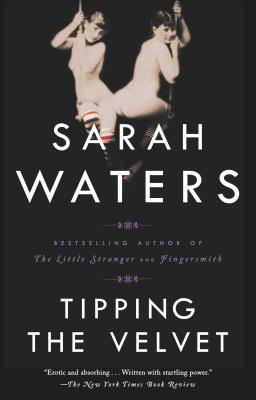

In [48]:
# Could have been implemented in Streamlit web app through custom HTML
display.Image(df['cover_url'][1])